# Exercise 01 - Sample Solution

In [ ]:

import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl #this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes
import seaborn as sns #sets up styles and gives us more plotting options
#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import warnings
warnings.filterwarnings('ignore') #hide warning

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

mpath = "/content/gdrive/My Drive/Colab Notebooks/Data Science Class/Exercise/"

## Exercise 1: Data Preparation

a) Load the wine dataset in the data folder and produce the following textual descriptions about:<br>
- Overview of the data, e.g. what it is about? (Hint: Explore and try to find it on the WWW?)
- The variables, e.g. how many are there, what are the types (quantitative, nominal, ordinal)

In [ ]:
#df = pd.read_csv("data/wine.csv") # Load wine dataset
df = pd.read_csv(mpath+"data/wine.csv") # Load wine dataset
df.head() # Found out that it is without header

,1,14.23,1.71,-1,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,-1.00,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


Information available __[here](https://archive.ics.uci.edu/ml/datasets/wine)__ <br>
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

1. Alcohol 
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline

In [ ]:
#df = pd.read_csv("data/wine.csv", header=None) # Reloading the dataset, now without taking the first row as header
df = pd.read_csv(mpath+"data/wine.csv", header=None) # Reloading the dataset, now without taking the first row as header
df.columns = ['type', 'alcohol', 'malic', 'ash', 'alcalinity', 'magnesium', 'phenols', 'flavanoids', 'nonflavanoids', 'proanthocyanins', 'color', 'hue', 'dilution', 'proline']

In [ ]:
df.head()

,type,alcohol,malic,ash,alcalinity,magnesium,phenols,flavanoids,nonflavanoids,proanthocyanins,color,hue,dilution,proline
0,1,14.23,1.71,-1.00,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,-1.00,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Quantitative: Alcohol, Malic, Ash,Alcalinity, Magnesium, Phenols, Flavanoids, Nonflavanoids, Proanthocyanins, Color, Hue, Dilution, Proline <br>
Nominal: Type

In [ ]:
print(df.shape)
df.describe()

(178, 14)


,type,alcohol,malic,ash,alcalinity,magnesium,phenols,flavanoids,nonflavanoids,proanthocyanins,color,hue,dilution,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,1.799045,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,1.290044,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,-1.000000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,1.982500,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.300000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.500000,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


b)	Are there any unusual in respect to one or more variables?<br>
Maximum values for the color and to an extent flavanoids are rather high compared to their .75 percentile. Without plotting the distribution (and maybe statistical tests), it is unclear whether such a point is an outlier or not.

c) Inspect data quality: Are there missing values? Are there values hinting data quality problems?

In [ ]:
print(len(np.where(df['ash'] < 0)[0]))
print(len(np.where(df['ash'] < 0)[0]) / len(df) * 100)

30
16.853932584269664


Negative values on 30 rows (~17% fo the data) of the ash variables

d) Remove observations that have missing values or replace missing value by for example the mean value or the most common element.

In [ ]:
# Get rows with missing value
replace_ix = np.where(df['ash'] < 0)[0]

# Get mean from the rest of the data
clean_ix = np.where(df['ash'] >= 0)[0]
ash_mean = np.mean(df['ash'][clean_ix])

# Replace missing values with the mean
df['ash'][np.where(df['ash'] < 0)[0]] = ash_mean
df.describe()

,type,alcohol,malic,ash,alcalinity,magnesium,phenols,flavanoids,nonflavanoids,proanthocyanins,color,hue,dilution,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366419,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.259105,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.260000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.366419,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.500000,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Exercise 2: Global Exploration
a)	Distribution analysis: Pick an arbitrary “interesting” variable and:
- Create a histogram to show the value distribution, and plot the mean and median lines on top of it.
- What does the histogram tell you, what about the mean and median values, are they a representative measure of central tendency in this particular case?

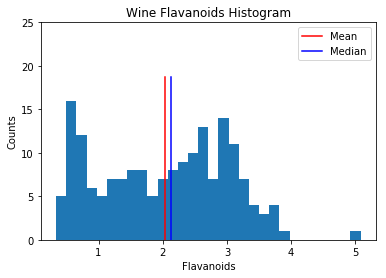

In [ ]:
plt.hist(df.flavanoids.values, bins=30)
plt.ylim([0, 25])
plt.axvline(df.flavanoids.mean(), 0, 0.75, color='r', label='Mean')
plt.axvline(df.flavanoids.median(), 0, 0.75, color='b', label='Median')
plt.xlabel("Flavanoids")
plt.ylabel("Counts")
plt.title("Wine Flavanoids Histogram")
plt.legend();

The mean and median values are quite close to each other, however the distribution could be bimodal, ie. it might be a composition of two distributions. The suspicion of outlier(s) on the high end of this variable value seems to be warranted.<br><br>
b)	Group analysis: Pick (or create) a second variable to group your first variable with and:
- Summarize the grouped data by a measure, e.g. mean, median, or standard deviation.
- Create a bar chart, and write down your observation.

In [ ]:
# function to create a ordinal variable of alcohol content
def alcohol_content(abv):
    if abv <= 11.5: return 'low'
    elif abv <= 13.5: return 'medium'
    else: return 'high'

df['alcohol_content'] = df.alcohol.apply(lambda x: alcohol_content(x))
df['alcohol_content'].describe()

count        178
unique         3
top       medium
freq         119
Name: alcohol_content, dtype: object

In [ ]:
print('Mean: ', df.groupby('alcohol_content').flavanoids.mean(), '\n') # one metric at a time
print(df.groupby('alcohol_content').flavanoids.agg(['mean', 'std', 'median'])) # multiple metrics at once

Mean:  alcohol_content
high      2.538182
low       2.387500
medium    1.782017
Name: flavanoids, dtype: float64 

                     mean       std  median
alcohol_content                            
high             2.538182  1.055815   2.910
low              2.387500  0.360035   2.375
medium           1.782017  0.892427   1.750


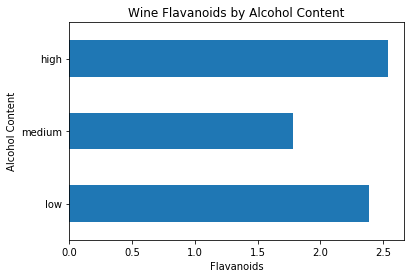

In [ ]:
avg_flav = df.groupby('alcohol_content').flavanoids.mean()
avg_flav[['low','medium','high']].plot(kind='barh')
plt.xlabel("Flavanoids")
plt.ylabel("Alcohol Content")
plt.title("Wine Flavanoids by Alcohol Content");

Wines with medium alcohol content have on average lower amount of flavanoids phenols.

c)	Relationship analysis: Pick two continuous variables and plot them against each other on a scatter plot. Is there any visible trend?

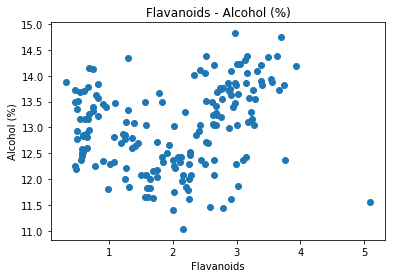

In [ ]:
plt.scatter(df.flavanoids, df.alcohol)
plt.xlabel("Flavanoids")
plt.ylabel("Alcohol (%)")
plt.title("Flavanoids - Alcohol (%)");

There is no clear linear trend. It seems like an V or U-shape. This indicates a quadratic relationship, ie. a quadratic model might be a good fit.

## Exercise 3: Group Exploration
a)	Group comparison: Pick one continuous variable and one categorical variable. Compare the distributions of the continuous variables between each category using one or more of these seaborn functions boxplot, violinplot, stripplot, or swarmplot.

In [ ]:
sns.set()

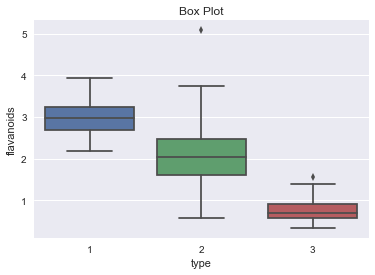

In [ ]:
sns.boxplot(data=df, x='type', y='flavanoids')
plt.title('Box Plot');

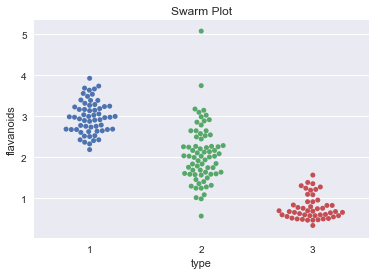

In [ ]:
sns.swarmplot(data=df, x='type', y='flavanoids')
plt.title('Swarm Plot');

b)	Explore all possible relations using Scatter Plot Matrix: Hint: Use the PairGrid function. What do you see?

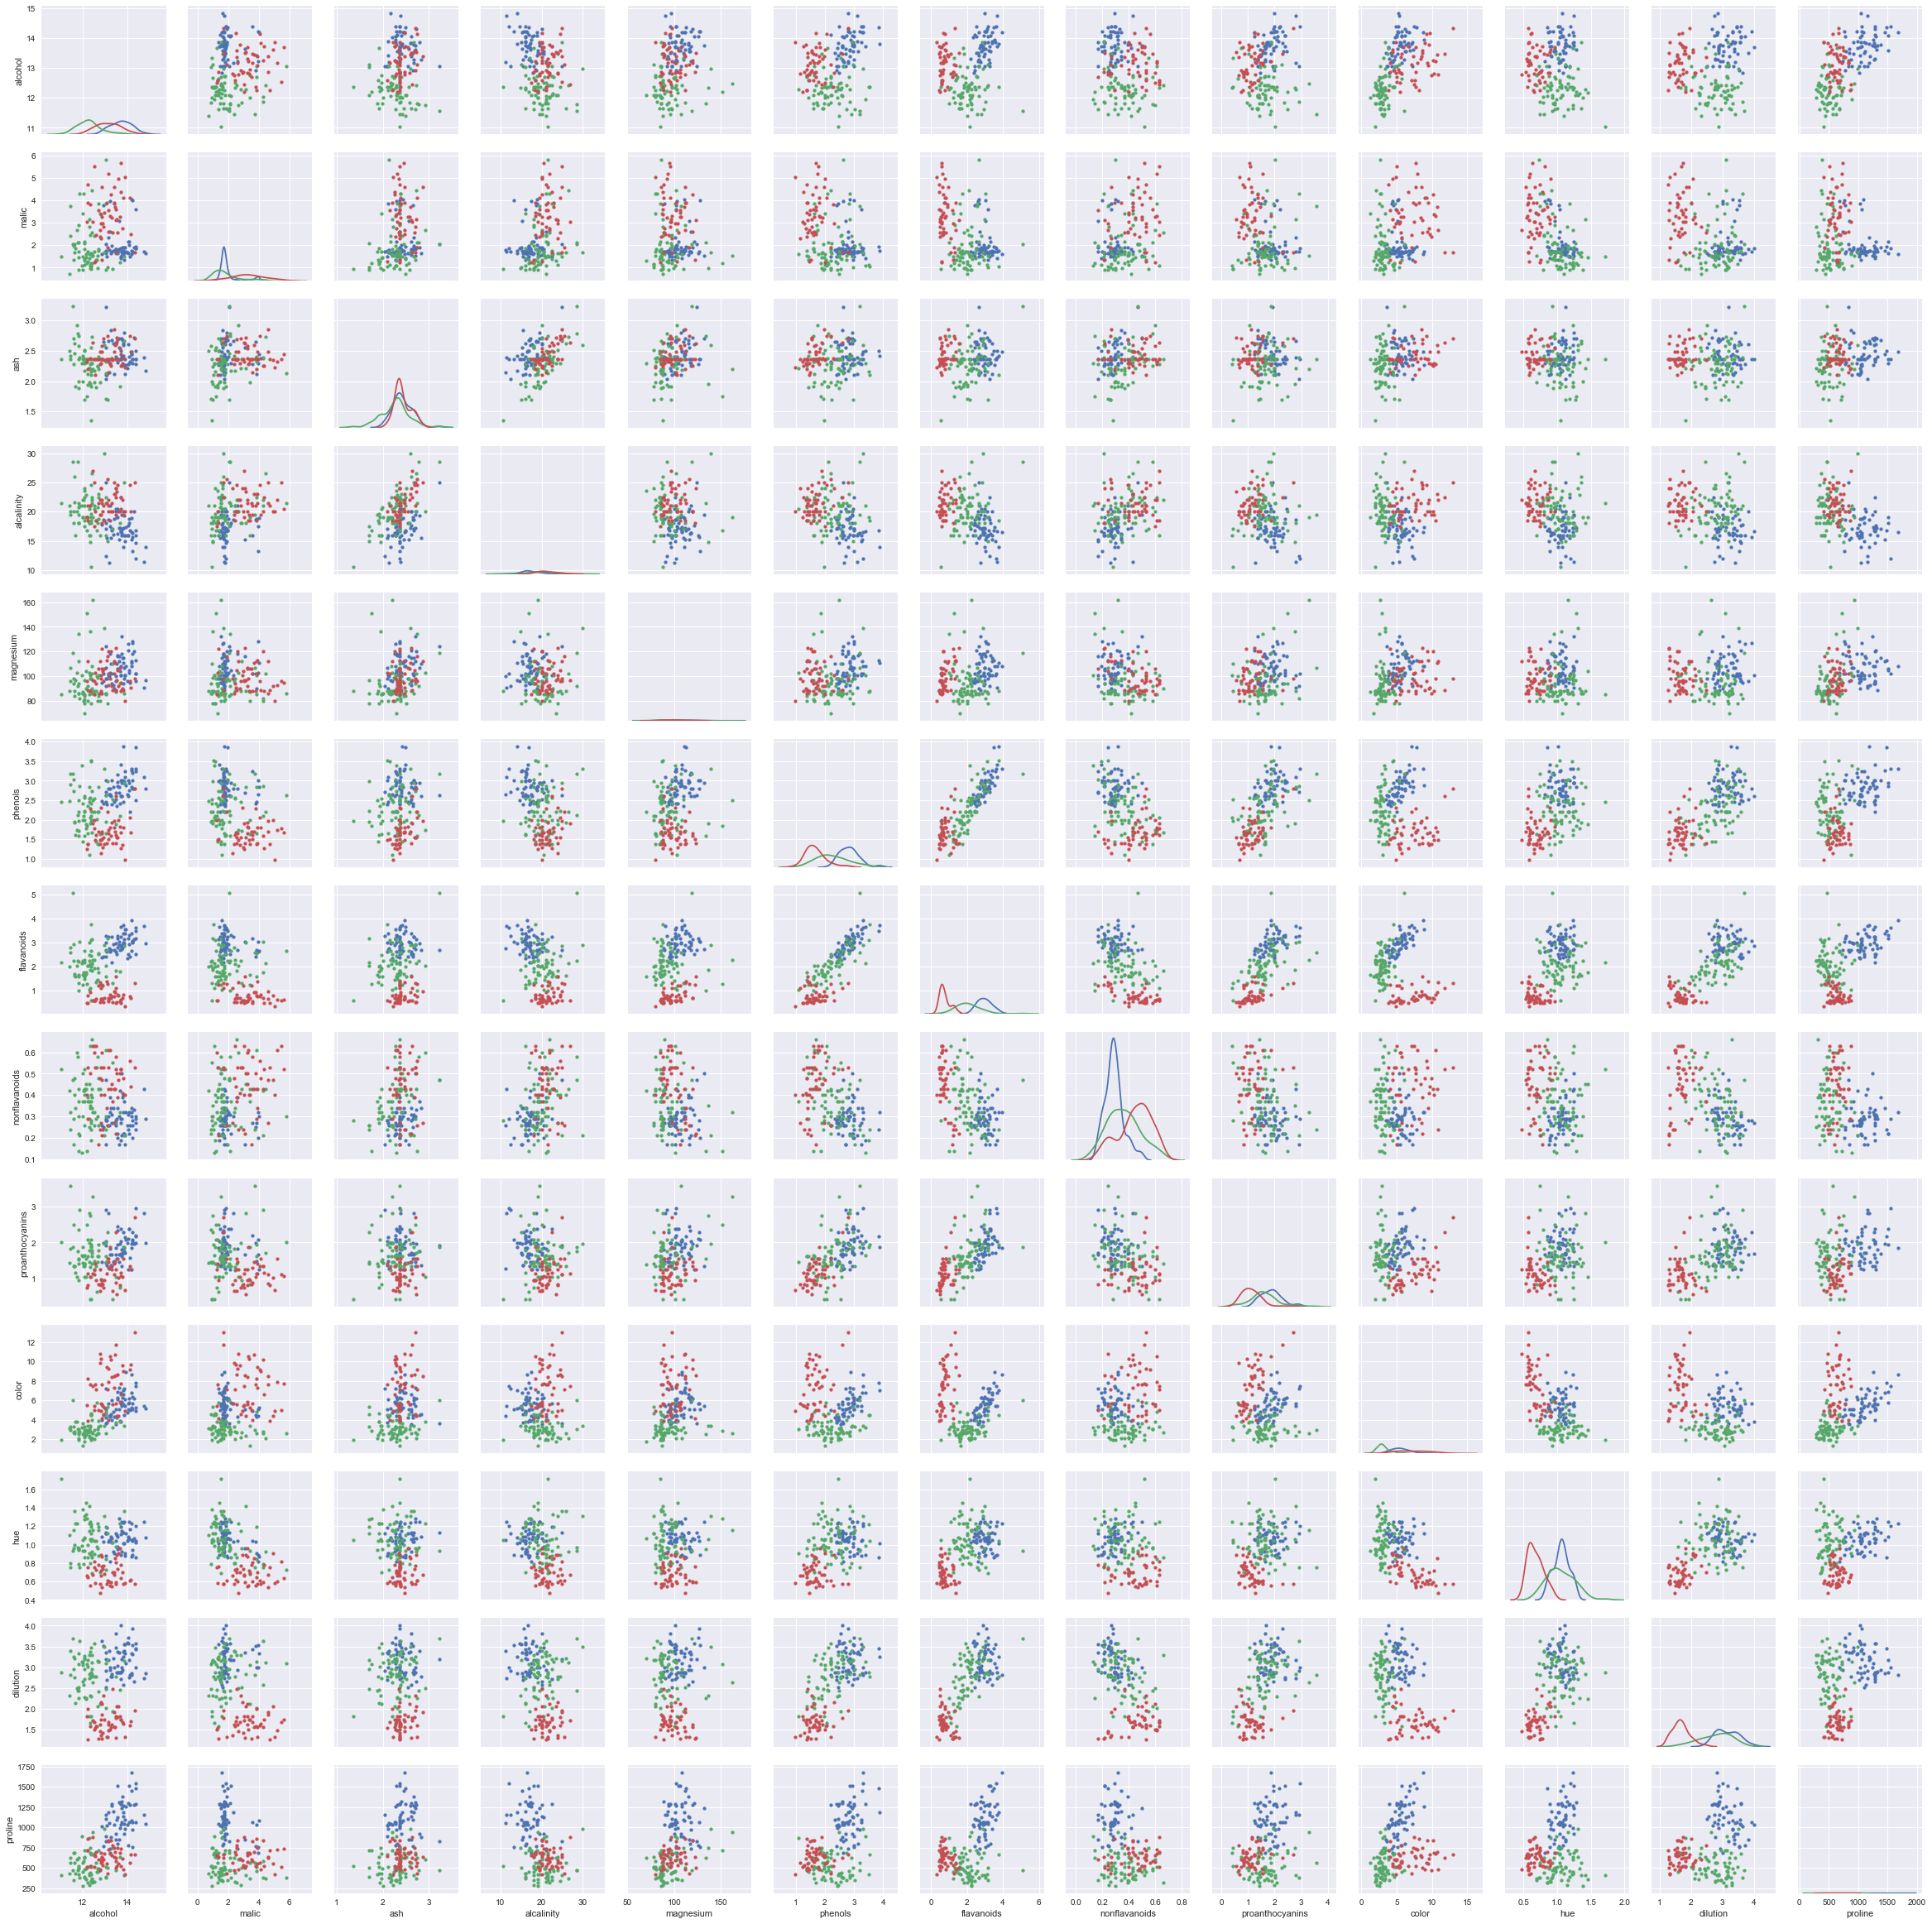

In [ ]:
g = sns.PairGrid(df, vars=df.columns[1:-1].tolist(), hue='type')
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=15);

Question: Can we separate the classes using the attributes?
Overall the classes seem to be well-separable using combinations of pairs of attributes and for some attributes on their own; Some combinations of attributes work well to differentiate just a single class from the others.
All attributes show quite some spread (different values), however, for some combinations of classes and attributes it is rather small. There are few paired values that might be considered outlying.

Examples:
2nd row: red class differs mainly along Y-axis, blue/green along X-axis; this means red has low variation (is fairly independent) of the attribute on the X-axis; blue/green fairly independenent on Y-axis;
7th row: classes are fairly well separable; this would hold even for the attribute on the Y-axis on its own, but a second attribute often helps, eg. columns 1 or 6, but not so much columns 3 and 5
last row: green and red not well-separable; but blue is
3rd last row: top green point appears to be relatively far away from other points, but unclear if it is an outlier


Question: Is the class helpful in modeling the relationship between attributes?
Sometimes you also notice that there is strongly varying dependence on an attribute given the class that might be exploited for modeling. For example, consider the last row. Say we want to predict proline using color. It is easy to see that for the blue and green classes there seems to be a strong correlation indicating a strong increase in proline given an increase in color. For the red class there is almost no increase in proline given an increase in color.

c)	Explore the correlations between at least 4 variables by creating a correlation matrix both in table and plot form. What do you notice?

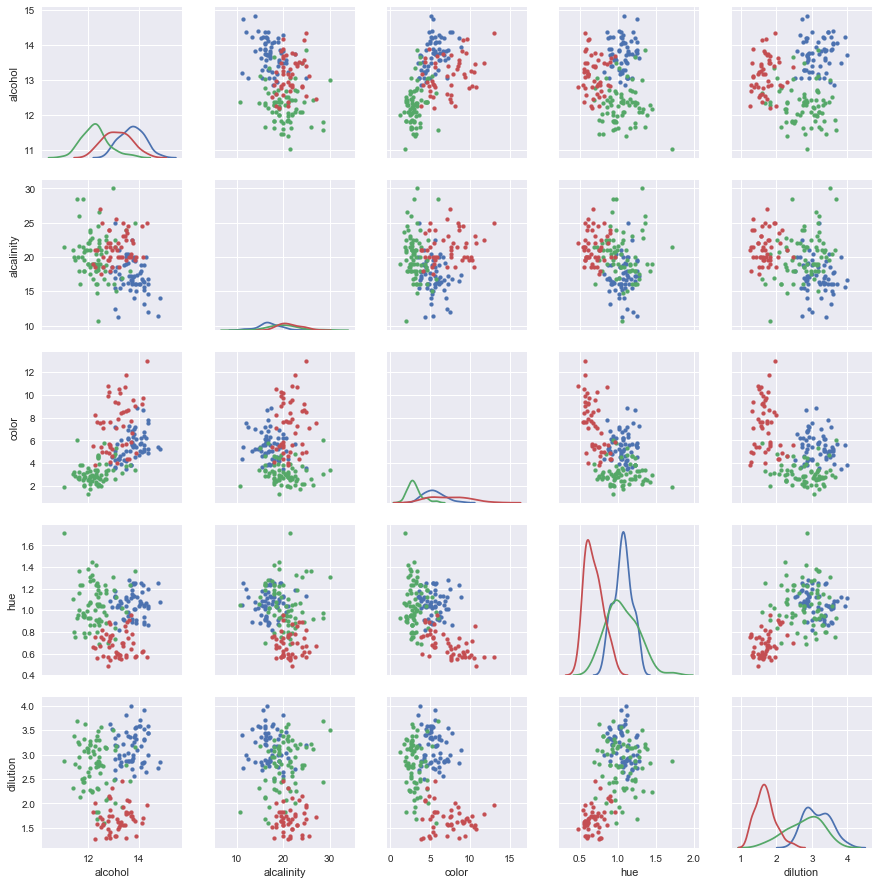

In [ ]:
g = sns.PairGrid(df, vars=['alcohol', 'alcalinity', 'color', 'hue', 'dilution'], hue='type')
g.map_diag(sns.kdeplot)
g.map_offdiag(plt.scatter, s=15);

For separability, alcohol and dilution as well as color and dilution seems to work reasonably well, whereas e.g. dilution and hue results in a mix of blue and  green class instances.
Individual variables as indidacted by the distributions on the diagonal don't allow for an easy separation.
Some variables seem to be correlated, e.g. hue and dilution, others not, e.g. alcohol and dilution.
The relationship seems to be class dependent, though this is not always very clear. For instance consider color and alcohol. We see that the color value for the red class increases steeply with an increase in alcohol, whereas it does not so much for the blue class. Thus, it might be worth to fit separate models per class.
There are few obvious outliers, e.g. for hue/alcohol there is one pont from the green class that is an outlier candidate.


In [ ]:
df[['alcohol', 'alcalinity', 'color', 'hue', 'dilution']].corr()

,alcohol,alcalinity,color,hue,dilution
alcohol,1.000000,-0.310235,0.546364,-0.071747,0.072343
alcalinity,-0.310235,1.000000,0.018732,-0.273955,-0.276769
color,0.546364,0.018732,1.000000,-0.521813,-0.428815
hue,-0.071747,-0.273955,-0.521813,1.000000,0.565468
dilution,0.072343,-0.276769,-0.428815,0.565468,1.000000


interactive(children=(Dropdown(description='name', options=('RdBu', 'RdGy', 'PRGn', 'PiYG', 'BrBG', 'RdYlBu', …

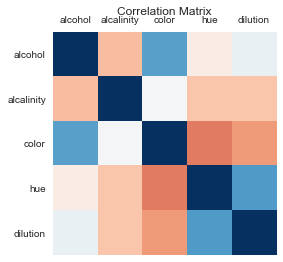

In [ ]:
dpal = sns.choose_colorbrewer_palette('diverging', as_cmap=True)
plt.matshow(df[['alcohol', 'alcalinity', 'color', 'hue', 'dilution']].corr(), cmap=dpal, vmin=-1, vmax=1)
ax = plt.gca()
ax.tick_params(axis='both', which='both',length=0)
ax.grid(False)
plt.title("Correlation Matrix")
plt.xticks(range(5), ['alcohol', 'alcalinity', 'color', 'hue', 'dilution'])
plt.yticks(range(5), ['alcohol', 'alcalinity', 'color', 'hue', 'dilution']);